## 1.	Write down code to handling missing values in dataset?

In [ ]:
import pandas as pd

# Load the dataset
file_path = "datasets/diabetes_edited_for_lab.csv"
df = pd.read_csv(file_path)

# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Replacing with the mean value
df.fillna(df.mean(), inplace=True)

# # Check if missing values are handled
print("\nMissing values after handling:\n", df.isnull().sum())



Missing values before handling:
 Pregnancies                  4
Glucose                      1
BloodPressure                2
SkinThickness                6
Insulin                     13
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                     18
dtype: int64

Missing values after handling:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## 2.	Write code to handle oulier using z score methos?

In [23]:
import numpy as np
from scipy import stats

import pandas as pd

# Load the dataset
file_path = "datasets/diabetes_edited_for_lab.csv"
df = pd.read_csv(file_path)

# Define a function to remove outliers using the Z-score method
def remove_outliers_zscore(data, threshold=3):
    numeric_cols = data.select_dtypes(include=[np.number]).columns  # Select numeric columns
    data = data.copy()  # Create a copy to avoid modifying the original DataFrame
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())  # Handle missing values
    z_scores = np.abs(stats.zscore(data[numeric_cols]))  # Compute Z-score
    filtered_data = data[(z_scores < threshold).all(axis=1)]  # Keep only rows within the threshold
    return filtered_data

# Remove outliers
df_cleaned = remove_outliers_zscore(df, threshold=3)

# Print before and after shape
print("Original shape:", df.shape)
print("Shape after outlier removal:", df_cleaned.shape)



Original shape: (2000, 9)
Shape after outlier removal: (1790, 9)


## 3.	Write code to detect oulier in dataset.

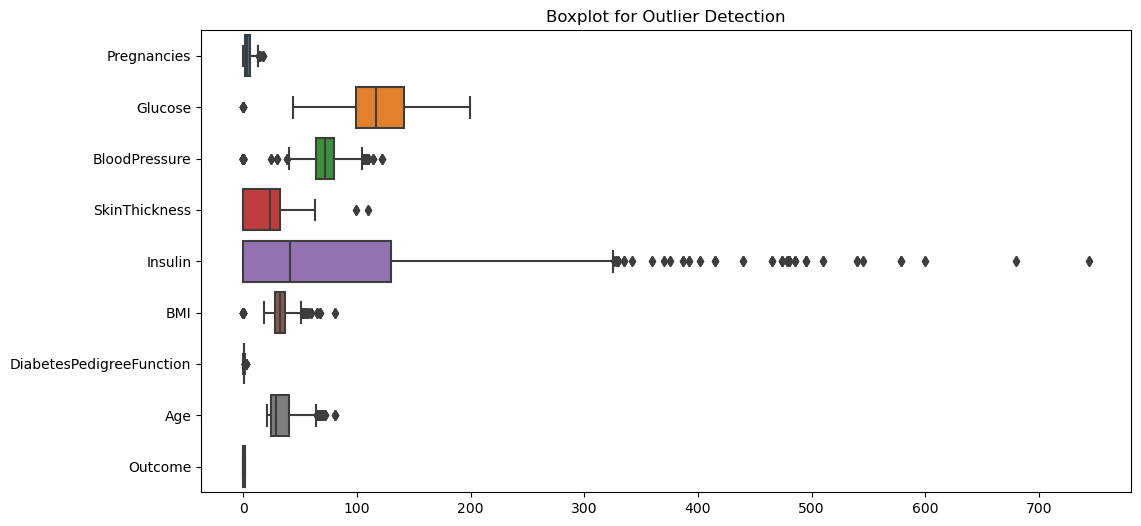

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Plot boxplots for all numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()


## 4.	Write code to perform feature scaling?

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max Scaling on the numerical columns
scaled_features = scaler.fit_transform(df_cleaned.select_dtypes(include=[float, int]))

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df_cleaned.columns)

# Display the first few rows of the scaled DataFrame
print(df_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.153846  0.606452       0.387755       0.583333  0.200943  0.418478   
1     0.285456  0.258065       0.591837       0.516667  0.310945  0.543478   
2     0.285456  0.651613       0.461375       0.349967  0.200943  0.706522   
3     0.285456  0.587097       0.448980       0.700000  0.621891  0.654891   
4     0.285456  0.832258       0.551020       0.533333  0.659204  0.769022   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.037065  0.553191  1.000000  
1                  0.117247  0.042553  0.345106  
2                  0.417549  0.212766  1.000000  
3                  0.217095  0.063830  1.000000  
4                  0.817700  0.787234  0.345106  


## 5.	Write code to check No multicollinearity in dataset?

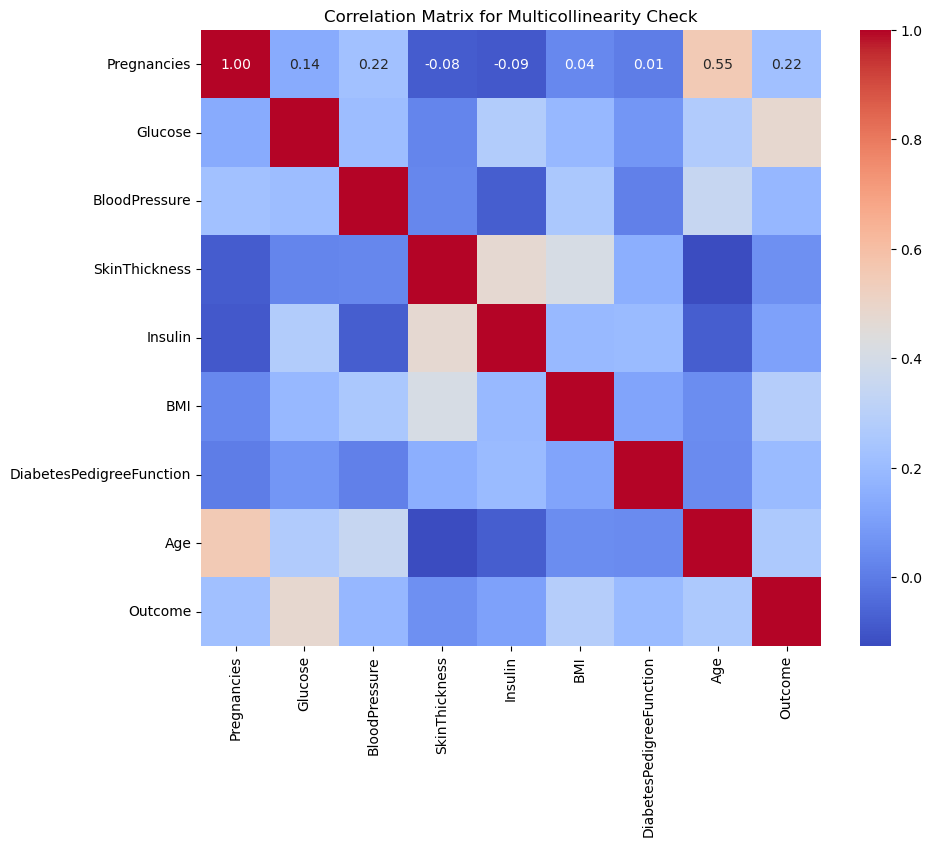

In [26]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Multicollinearity Check")
plt.show()

## 6.	Write down code to build linear regression model without EDA & Feature engineering?

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df_cleaned.drop(columns=['Outcome'])  # Drop the target column
y = df_cleaned['Outcome']  # Target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.14192150849629076
R-squared: 0.35772499241106603


## 7.	Write code to perform feature encoding?

In [41]:
# Using the another dataset with the categorical column 
df2=pd.read_csv("Datasets/Iris (1).csv")
# Perform encoding on the 'Iris' column
df2['Iris_encoded'] = df2['Species'].astype('category').cat.codes

# Display the first few rows to verify encoding
print(df2.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Iris_encoded  
0             0  
1             0  
2             0  
3             0  
4             0  


## 8.	Write code to performance matrix in classification?

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
conf_matrix = confusion_matrix(y_test, y_pred.round())

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred.round()))

Accuracy: 0.8016759776536313
Precision: 0.7701149425287356
Recall: 0.5677966101694916
F1 Score: 0.6536585365853659

Confusion Matrix:
 [[220  20]
 [ 51  67]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       240
         1.0       0.77      0.57      0.65       118

    accuracy                           0.80       358
   macro avg       0.79      0.74      0.76       358
weighted avg       0.80      0.80      0.79       358



## 9.	Write code to make logistic regression model?

In [44]:
# Ensure target variables contain discrete class labels
y_train = y_train.round().astype(int)
y_test = y_test.round().astype(int)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Print the metrics
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)
print("\nConfusion Matrix:\n", conf_matrix_logistic)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression Model Performance:
Accuracy: 0.8044692737430168
Precision: 0.7727272727272727
Recall: 0.576271186440678
F1 Score: 0.6601941747572816

Confusion Matrix:
 [[220  20]
 [ 50  68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       240
           1       0.77      0.58      0.66       118

    accuracy                           0.80       358
   macro avg       0.79      0.75      0.76       358
weighted avg       0.80      0.80      0.80       358



## 10.	Write code to convert all categorical values in uppercase in any column?

In [45]:
# Convert all categorical values in the 'Species' column to uppercase
df2['Species'] = df2['Species'].str.upper()

# Display the first few rows to verify the changes
print(df2.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  IRIS-SETOSA   
1   2            4.9           3.0            1.4           0.2  IRIS-SETOSA   
2   3            4.7           3.2            1.3           0.2  IRIS-SETOSA   
3   4            4.6           3.1            1.5           0.2  IRIS-SETOSA   
4   5            5.0           3.6            1.4           0.2  IRIS-SETOSA   

   Iris_encoded  
0             0  
1             0  
2             0  
3             0  
4             0  
